In [1]:
pip install catboost

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.


In [2]:
pip install numpy==1.23.0 --force

  Using cached numpy-1.23.0-cp39-cp39-win_amd64.whl.metadata (2.2 kB)
Using cached numpy-1.23.0-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.0 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.0 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.23.0 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

C:\Users\jenny\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("data.csv")

df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


# Первоначальная проверка

In [6]:
df.shape

(22676, 12)

In [7]:
# df.drop_duplicates(['id'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
df.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [10]:
df.isnull().sum()

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

In [11]:
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [12]:
df.describe(include=['object'])

,Apartment type,Metro station,Region,Renovation
count,22676,22676,22676,22676
unique,2,547,2,4
top,Secondary,Красногвардейская,Moscow,Cosmetic
freq,13152,2697,16113,12788


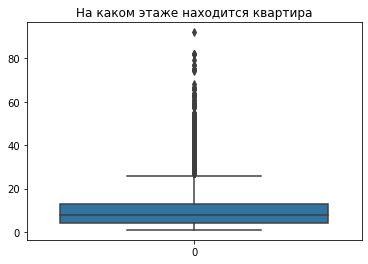

In [13]:
sns.boxplot(data=df.Floor)
plt.title('На каком этаже находится квартира')
plt.show()

In [14]:
df.Floor.min()

1.0

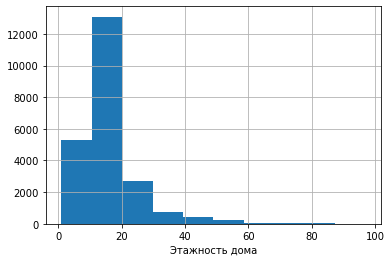

In [15]:
df['Number of floors'].hist()
plt.xlabel('Этажность дома');

In [16]:
df['Number of floors'].value_counts()

20    2893
14    2214
16    1848
17    1829
11    1818
      ... 
63       1
86       1
70       1
61       1
82       1
Name: Number of floors, Length: 83, dtype: int64

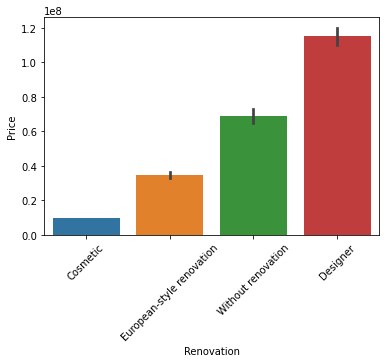

In [17]:
sns.barplot(data=df, x='Renovation', y='Price')
plt.xticks(rotation=45);

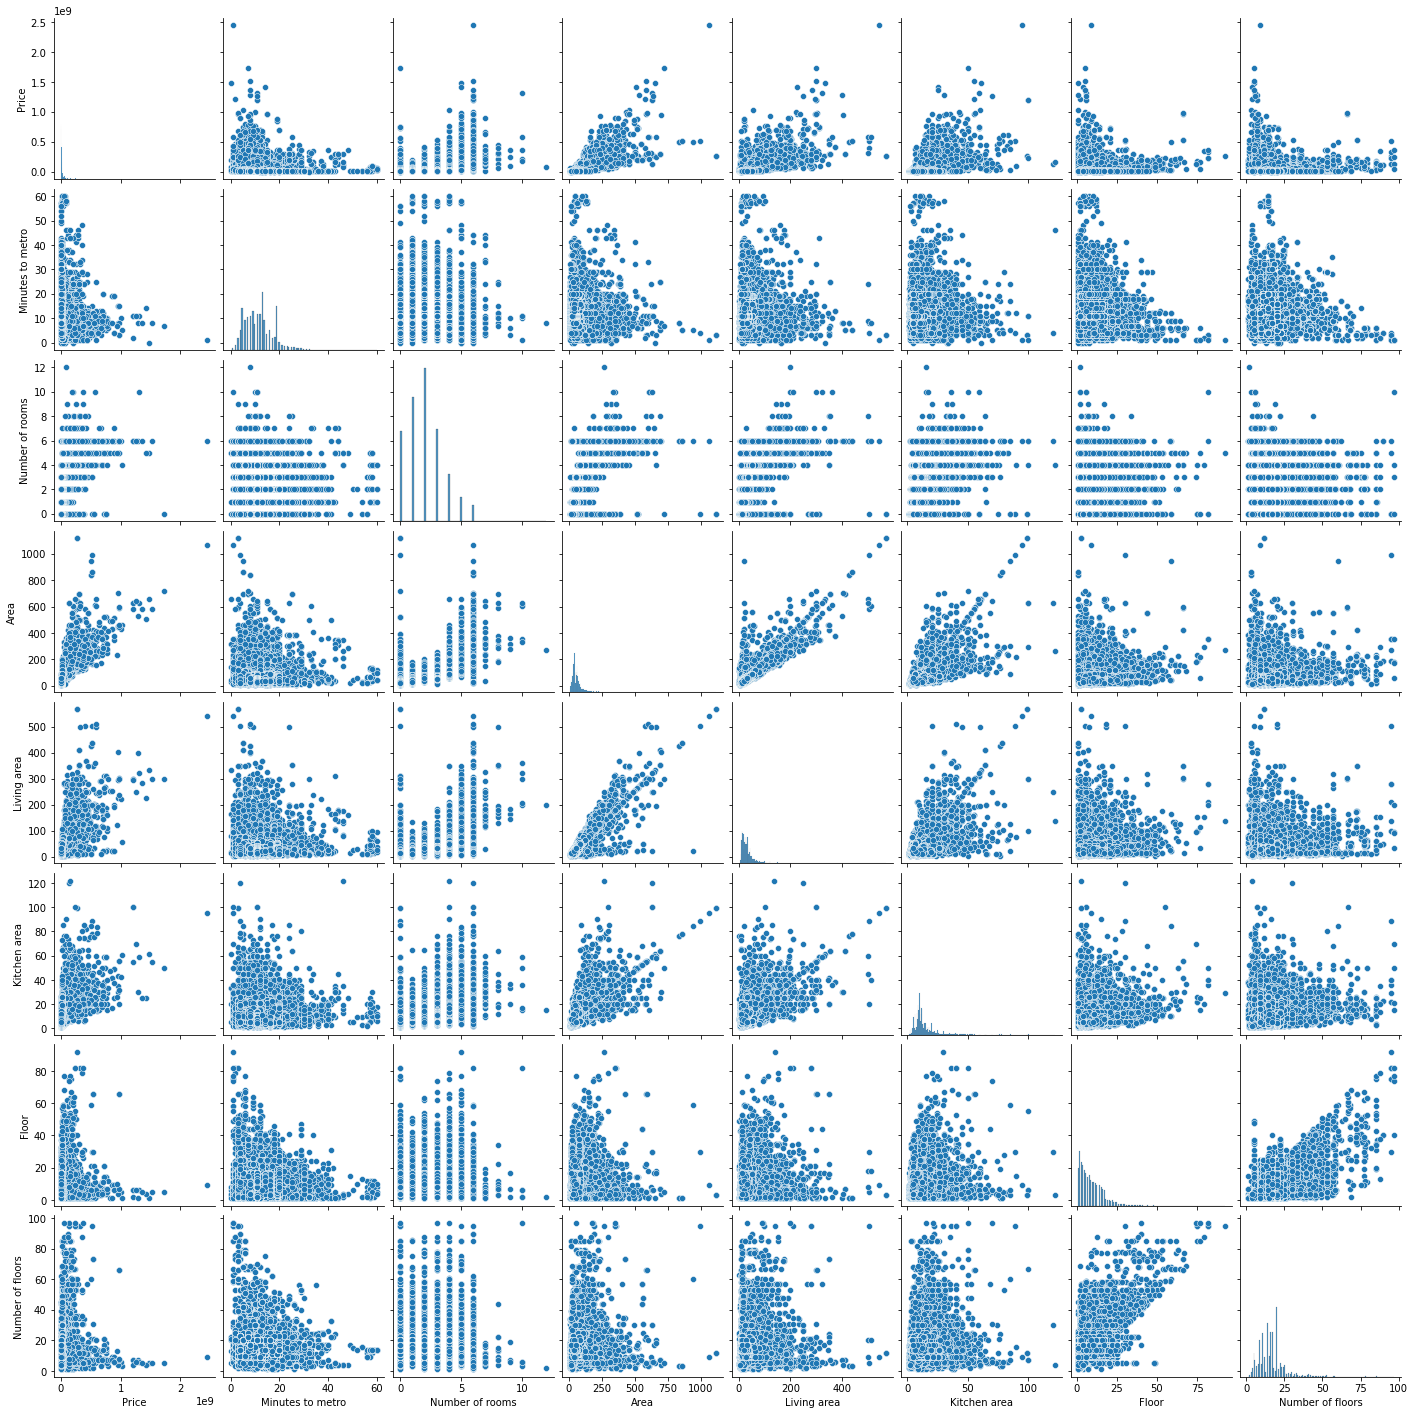

In [18]:
sns.pairplot(df);

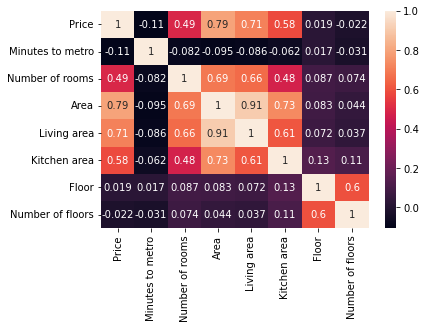

In [19]:
sns.heatmap(df.select_dtypes(['float', 'int']).corr(), annot=True);

Метод межквартильного размаха (Interquartile Range, IQR) является статистическим методом для выявления выбросов в данных. Он основан на интерквартильном расстоянии, которое представляет собой разницу между верхним (Q3) и нижним (Q1) квартилями данных. Квартили - это значения, которые разбивают упорядоченный набор данных на четыре равные части.

Шаги метода межквартильного размаха:

1. **Вычисление Q1 и Q3:**
   - Q1 (нижний квартиль) - значение, ниже которого находится 25% данных.
   - Q3 (верхний квартиль) - значение, ниже которого находится 75% данных.

2. **Вычисление IQR:**
   - IQR = Q3 - Q1.

3. **Определение "усов" (whiskers):**
   - Нижний ус: Q1 - 1.5 * IQR.
   - Верхний ус: Q3 + 1.5 * IQR.

4. **Выделение выбросов:**
   - Все значения, лежащие за пределами усов, считаются выбросами.

Этот метод предполагает, что большинство данных сосредоточено внутри интерквартильного размаха, и выбросы могут быть обнаружены по удаленным от этого интервала значениям. Определение коэффициента 1.5 в формуле для усов является общепринятым, но в некоторых случаях его можно изменять в зависимости от конкретной задачи.

Метод межквартильного размаха является относительно простым и быстрым способом выявления выбросов. Однако, стоит отметить, что он может не обнаруживать все выбросы, и иногда могут быть ложные срабатывания. Комбинирование этого метода с другими методами анализа выбросов может повысить надежность результата.

In [20]:
def find_outliers_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    IQR = q3 - q1
    
    outliers = df[((df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR)))] 
    return outliers

In [21]:
find_outliers_IQR(df, 'Price')

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
180,5.150000e+07,Secondary,Мякинино,14.0,Moscow region,2.0,78.6,10.0,13.1,3.0,4,Designer
181,5.300000e+07,Secondary,Мякинино,14.0,Moscow region,2.0,79.3,12.0,13.2,3.0,4,Designer
314,1.088000e+08,Secondary,Чеховская,5.0,Moscow,3.0,108.8,57.1,15.6,3.0,3,Without renovation
315,5.300000e+07,Secondary,Арбатская,9.0,Moscow,3.0,96.9,59.0,11.1,2.0,5,Without renovation
317,1.050000e+08,Secondary,Белорусская,6.0,Moscow,3.0,145.0,75.4,18.6,3.0,6,Designer
...,...,...,...,...,...,...,...,...,...,...,...,...
12581,5.250000e+07,Secondary,Улица 1905 года,14.0,Moscow,0.0,50.0,27.4,10.0,5.0,13,Designer
12583,1.400000e+08,Secondary,Красные ворота,7.0,Moscow,0.0,130.0,70.0,20.0,8.0,8,Designer
12607,6.500000e+07,Secondary,Новаторская,10.0,Moscow,0.0,171.0,52.0,15.0,23.0,32,Without renovation
12673,2.950000e+08,Secondary,Ломоносовский проспект,24.0,Moscow,0.0,237.0,77.6,18.4,4.0,12,Without renovation


In [22]:
outliers = find_outliers_IQR(df, 'Price')

In [23]:
df.drop(outliers.index)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


# Обучение модели

In [24]:
y = df.Price

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [96]:
import pickle
# кодирование категориальных признаков
encoder = OneHotEncoder(sparse_output=False)  # Setting sparse=False to get a dense array
X_cat_encoded = encoder.fit_transform(df[['Apartment type', 'Renovation','Metro station','Region']])

# Сохранить кодировщик в файл
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# признаки в виде шкалы
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[['Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']])

# Combine encoded and scaled features
X_combined = np.hstack([X_num_scaled, X_cat_encoded])

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X_combined, y, test_size=0.25, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((17007, 562), (5669, 562), (17007,), (5669,))

In [28]:
import tensorflow as tf
class PrintLosses(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Эпоха {epoch+1}, Среднеквадратическая ошибка: {logs['loss']:.4f}")

In [29]:
train_model = CatBoostRegressor(
    iterations=10000,
    depth=6,
    learning_rate=1, 
    loss_function='MAPE',
    verbose=False
)
test_model = CatBoostRegressor(
    iterations=10000,
    depth=6,
    learning_rate=1, 
    loss_function='MAPE',
    verbose=False
)

In [30]:
import catboost
train_pool = catboost.Pool(X_train, label=y_train)
test_pool = catboost.Pool(X_test, label=y_test)

train_history=train_model.fit(train_pool, verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
history2=test_model.fit(test_pool,init_model=train_model,use_best_model=True, verbose=False,plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


In [32]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tkinter as tk
import tkinter.ttk as ttk
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import threading

# Загрузить кодировщик
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

# Масштабировщик данных
scaler = StandardScaler()

# Создать окно прогнозирования
def create_prediction_window():
    # Создать новое окно
    window = tk.Toplevel(root)

    # Метка для ввода минут до метро
    label_minutes_to_metro = ttk.Label(window, text="Введите минуты до метро:")
    label_minutes_to_metro.grid(row=0, column=0)

    # Поле ввода для минут до метро
    entry_minutes_to_metro = ttk.Entry(window)
    entry_minutes_to_metro.grid(row=0, column=1)

    # Метка для ввода площади
    label_area = ttk.Label(window, text="Введите площадь:")
    label_area.grid(row=1, column=0)

    # Поле ввода для площади
    entry_area = ttk.Entry(window)
    entry_area.grid(row=1, column=1)

    # Метка для ввода жилой площади
    label_living_area = ttk.Label(window, text="Введите жилую площадь:")
    label_living_area.grid(row=2, column=0)

    # Поле ввода для жилой площади
    entry_living_area = ttk.Entry(window)
    entry_living_area.grid(row=2, column=1)

    # Метка для ввода площади кухни
    label_kitchen_area = ttk.Label(window, text="Введите площадь кухни:")
    label_kitchen_area.grid(row=3, column=0)

    # Поле ввода для площади кухни
    entry_kitchen_area = ttk.Entry(window)
    entry_kitchen_area.grid(row=3, column=1)

    # Метка для ввода этажа
    label_floor = ttk.Label(window, text="Введите этаж:")
    label_floor.grid(row=4, column=0)

    # Поле ввода для этажа
    entry_floor = ttk.Entry(window)
    entry_floor.grid(row=4, column=1)

    # Метка для ввода количества этажей
    label_number_of_floors = ttk.Label(window, text="Введите количество этажей:")
    label_number_of_floors.grid(row=5, column=0)

    # Поле ввода для количества этажей
    entry_number_of_floors = ttk.Entry(window)
    entry_number_of_floors.grid(row=5, column=1)

    # Метка для вывода прогнозируемой цены
    label_prediction = ttk.Label(window, text="")
    label_prediction.grid(row=6, column=1)

    # Функция для получения закодированных значений категориальных признаков
    def get_encoded_categorical_features():
        # Получить введенные пользователем данные
        variable_apartment_type = dropdown1.get()  # Тип квартиры
        variable_metro_station = dropdown2.get()  # Станция метро
        variable_region = dropdown3.get()  # Регион
        variable_renovation = dropdown4.get()  # Тип ремонта

        # Преобразовать введенные пользователем данные в список для каждого категориального признака
        categorical_features = [
            [variable_apartment_type],
            [variable_metro_station],
            [variable_region],
            [variable_renovation],
        ]

        # Применить кодировщик к введенным пользователем данным
        encoded_categorical_features = encoder.transform(categorical_features)

        return encoded_categorical_features

    # Функция для прогнозирования цены квартиры
    def predict():
        try:
            # Получить закодированные значения категориальных признаков
            encoded_categorical_features = get_encoded_categorical_features()

            # Получить числовые признаки
            numerical_features = [
                float(entry_minutes_to_metro.get()),  # минуты до метро
                float(entry_area.get()),  # площадь
                float(entry_living_area.get()),  # жилая площадь
                float(entry_kitchen_area.get()),  # площадь кухни
                int(entry_floor.get()),  # этаж
                int(entry_number_of_floors.get()),  # количество этажей
            ]

            # Масштабировать числовые признаки
            numerical_features = scaler.transform([numerical_features])

            # Объединить категориальные и числовые признаки
            features = np.concatenate([encoded_categorical_features, numerical_features])

            # Сделать прогноз с использованием объединенных признаков
            prediction = model.predict(features)
            label_prediction.config(text=f"Прогнозируемая цена: {prediction[0]}")
        except Exception as e:
            print(e)
            label_prediction.config(text="Произошла ошибка при прогнозировании цены.")

    # Кнопка для запуска прогнозирования
    button_predict = ttk.Button(window, text="Прогнозировать", command=predict)
    button_predict.grid(row=7, column=1)

    # Запустить главное окно
    window.mainloop()

# Функция для запуска окна прогнозирования в отдельном потоке
def run_prediction_window():
    # Создать поток
    thread = threading.Thread(target=create_prediction_window)
    thread.start()

# Создать главное окно
root = tk.Tk()

# Удалить кнопку "Прогнозировать цену квартиры" из главного меню

# Запустить главное окно
root.mainloop()